In [52]:
#Project
import mysql.connector
import pandas as pd
import numpy as np
# import chart_studio.plotly as py
# import cufflinks as cf
from ipywidgets import interact

# cf.go_offline()
conn = mysql.connector.connect(
   host="localhost",
   user="root",
   passwd="",
   database='burmese_python_project')


df = pd.read_sql_query(
'''select *
from pythons''', conn)

df.head(5)

,objectid,Reporter,ComName,SciName,OccStatus,ObsDate,DateAcc,DateEnt,DateUp,Location,...,IDCred,Verified,Reviewer,ReviewDate,OrgSrcID,PID,Voucher,Museum,MuseumRec,Reference
0,8303498,Travis Mangione FWC,Burmese python,Python molurus ssp. bivittatus,Positive,24 Nov 2019,,26 Nov 2019,,"Miami-Dade, Florida, United States",...,Credible,Verified,FWCC Exotic Species Database,05 Dec 2019,,,0,,,
1,8303147,Edward F. Metzger III,Burmese python,Python molurus ssp. bivittatus,Positive,20 Nov 2019,,22 Nov 2019,22 Nov 2019,"Broward, Florida, United States",...,Verified,Verified,FWCC Exotic Species Database,05 Dec 2019,,,,,,
2,8298008,Michael Reupert NPS Big Cypress National Pres...,Burmese python,Python molurus ssp. bivittatus,Positive,07 Nov 2019,,12 Nov 2019,,"Collier, Florida, United States",...,Credible,Verified,FWCC Exotic Species Database,14 Nov 2019,,,0,HQ freezer ...,,
3,8295649,"matthew mccollister National Park Service, Big...",Burmese python,Python molurus ssp. bivittatus,Positive,06 Nov 2019,,07 Nov 2019,,"Collier, Florida, United States",...,Credible,Verified,FWCC Exotic Species Database,08 Nov 2019,,,0,,,
4,8295647,"matthew mccollister National Park Service, Big...",Burmese python,Python molurus ssp. bivittatus,Positive,05 Nov 2019,,07 Nov 2019,,"Collier, Florida, United States",...,Credible,Verified,FWCC Exotic Species Database,08 Nov 2019,,,0,,,


In [53]:
df.columns

Index(['objectid', 'Reporter', 'ComName', 'SciName', 'OccStatus', 'ObsDate',
       'DateAcc', 'DateEnt', 'DateUp', 'Location', 'Latitude', 'Longitude',
       'Datum', 'CoordAcc', 'Method', 'DataType', 'LocalOwner', 'Habitat',
       'Locality', 'Site', 'InfestAcre', 'GrossAcre', 'Abundance', 'Density',
       'NumCollect', 'Percentcov', 'TreatArea', 'TreatComm', 'Quantity',
       'QuantityU', 'TrapType', 'NumTraps', 'Comments', 'VisitType',
       'CollectTme', 'Surveyor', 'RecSource', 'RecOwner', 'RecSrcTyp',
       'OrigName', 'Nativity', 'Host', 'Host_Name', 'VerifyMthd', 'IDCred',
       'Verified', 'Reviewer', 'ReviewDate', 'OrgSrcID', 'PID', 'Voucher',
       'Museum', 'MuseumRec', 'Reference'],
      dtype='object')

##### Client Question: How many python observations do you predict will be recorded for the full 2019 year? 

In [54]:
df['ObsDate'].head() # need to convert to a date-time index

0    24 Nov 2019
1    20 Nov 2019
2    07 Nov 2019
3    06 Nov 2019
4    05 Nov 2019
Name: ObsDate, dtype: object

In [55]:
df.index = pd.to_datetime(df['ObsDate']).dt.year

df.drop(columns = ['ObsDate'], inplace = True)

df.head()

,objectid,Reporter,ComName,SciName,OccStatus,DateAcc,DateEnt,DateUp,Location,Latitude,...,IDCred,Verified,Reviewer,ReviewDate,OrgSrcID,PID,Voucher,Museum,MuseumRec,Reference
ObsDate,,,,,,,,,,,,,,,,,,,,,
2019-11-24,8303498,Travis Mangione FWC,Burmese python,Python molurus ssp. bivittatus,Positive,,26 Nov 2019,,"Miami-Dade, Florida, United States",25.76191,...,Credible,Verified,FWCC Exotic Species Database,05 Dec 2019,,,0,,,
2019-11-20,8303147,Edward F. Metzger III,Burmese python,Python molurus ssp. bivittatus,Positive,,22 Nov 2019,22 Nov 2019,"Broward, Florida, United States",26.29298,...,Verified,Verified,FWCC Exotic Species Database,05 Dec 2019,,,,,,
2019-11-07,8298008,Michael Reupert NPS Big Cypress National Pres...,Burmese python,Python molurus ssp. bivittatus,Positive,,12 Nov 2019,,"Collier, Florida, United States",25.86434,...,Credible,Verified,FWCC Exotic Species Database,14 Nov 2019,,,0,HQ freezer ...,,
2019-11-06,8295649,"matthew mccollister National Park Service, Big...",Burmese python,Python molurus ssp. bivittatus,Positive,,07 Nov 2019,,"Collier, Florida, United States",25.83131,...,Credible,Verified,FWCC Exotic Species Database,08 Nov 2019,,,0,,,
2019-11-05,8295647,"matthew mccollister National Park Service, Big...",Burmese python,Python molurus ssp. bivittatus,Positive,,07 Nov 2019,,"Collier, Florida, United States",25.87197,...,Credible,Verified,FWCC Exotic Species Database,08 Nov 2019,,,0,,,


In [56]:
by_year = df.pivot_table(index = 'ObsDate', values = 'objectid', aggfunc = 'count')

In [57]:
by_year

,objectid
ObsDate,
1979-10-24,1
1995-12-12,1
1996-02-12,1
1996-11-18,1
1997-11-03,2
...,...
2019-11-05,2
2019-11-06,1
2019-11-07,2


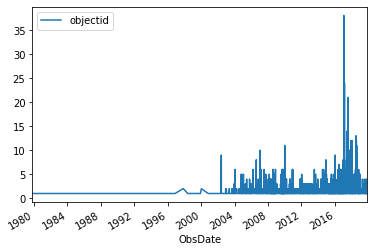

In [58]:
by_year.plot()